Transfer Learning is a Deep Learning technique where we use pre-trained model.This pre-trained model is trained for one task and can be re-trained for a similar task with a smaller dataset

In [2]:
from zipfile import ZipFile
dataset = '/content/drive/MyDrive/archive.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


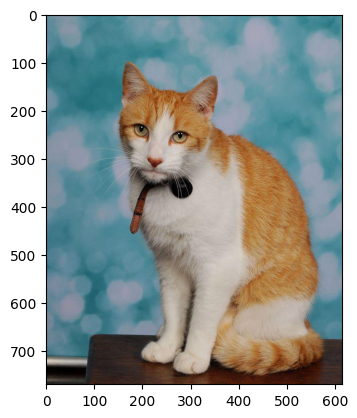

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('/content/test/cats/cat_1.jpg')

plt.imshow(img)
plt.show()

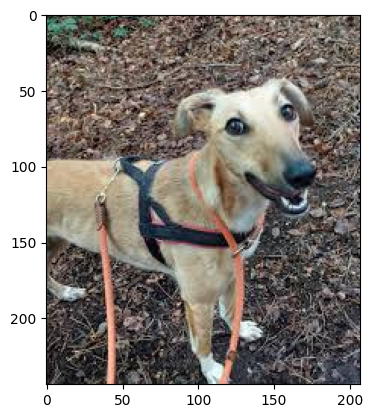

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('/content/test/dogs/dog_114.jpg')

plt.imshow(img)
plt.show()

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from tensorflow import keras
from PIL import Image

Image resizing

In [6]:
dog_pic_list = os.listdir('/content/train/dogs')
cat_pic_list = os.listdir('/content/train/cats')

In [7]:
sample_img = mpimg.imread('/content/train/dogs/dog_0.jpg')
sample_img.shape

(1067, 1600, 3)

In [8]:
print(len(dog_pic_list))
print(len(cat_pic_list))

278
279


In [9]:
print(dog_pic_list[0])
print(cat_pic_list[0])

dog_136.jpg
cat_78.jpg


In [10]:
resized_folder = '/content/img_resized/'

In [11]:
if not os.path.exists(resized_folder):
    os.makedirs(resized_folder)

for i in dog_pic_list:
    img_dog = Image.open(os.path.join('/content/train/dogs', i))
    img_resized_dog = img_dog.resize((224, 224))
    img_resized_dog = img_resized_dog.convert('RGB')
    newImgpath = os.path.join(resized_folder, i)
    img_resized_dog.save(newImgpath)

In [12]:
sample_img = mpimg.imread('/content/img_resized/dog_82.jpg')
sample_img.shape

(224, 224, 3)

In [13]:
for i in cat_pic_list:
    img_dog = Image.open(os.path.join('/content/train/cats', i))
    img_resized_dog = img_dog.resize((224, 224))
    img_resized_dog = img_resized_dog.convert('RGB')
    newImgpath = os.path.join(resized_folder, i)
    img_resized_dog.save(newImgpath)

In [14]:
sample_img = mpimg.imread('/content/img_resized/cat_590.jpg')
sample_img.shape

(224, 224, 3)

In [38]:
data = os.listdir('/content/img_resized')

labels = []

for i in data:
    if i[0:3] == 'cat':
        labels.append(0)
    else:
        labels.append(1)



In [15]:
import cv2
import glob

In [16]:
image_dir = '/content/img_resized/'
image_extension = ['jpg', 'png']
files = []

[files.extend(glob.glob(image_dir + '*' + i))for i in image_extension]


dog_cats_images = np.asarray([cv2.imread(file) for file in files])

In [18]:
dog_cats_images.shape

(557, 224, 224, 3)

array([[[ 93,  87,  76],
        [ 95,  89,  78],
        [ 96,  90,  79],
        ...,
        [107, 101,  88],
        [107, 100,  91],
        [108, 101,  92]],

       [[ 92,  86,  75],
        [ 94,  88,  77],
        [ 96,  90,  79],
        ...,
        [105, 101,  90],
        [104,  99,  90],
        [104,  99,  90]],

       [[ 91,  85,  74],
        [ 94,  88,  77],
        [ 96,  90,  79],
        ...,
        [102,  99,  91],
        [100,  97,  89],
        [ 99,  96,  88]],

       ...,

       [[107, 145, 175],
        [100, 138, 168],
        [ 91, 129, 159],
        ...,
        [123, 163, 192],
        [125, 165, 194],
        [126, 166, 195]],

       [[119, 157, 187],
        [110, 148, 178],
        [103, 141, 171],
        ...,
        [125, 163, 193],
        [125, 163, 193],
        [125, 163, 193]],

       [[115, 153, 183],
        [104, 142, 172],
        [ 99, 137, 167],
        ...,
        [129, 167, 197],
        [128, 166, 196],
        [127, 165, 195]]], dtype=uint8)
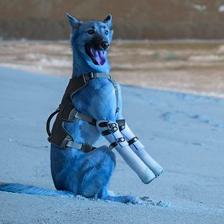

In [22]:
dog_cats_images[500]

In [39]:
X = dog_cats_images
y = np.array(labels)

array([[[ 36,  67,  36],
        [ 36,  67,  36],
        [ 36,  67,  36],
        ...,
        [ 40,  92,  45],
        [ 40,  92,  45],
        [ 40,  92,  45]],

       [[ 36,  67,  36],
        [ 36,  67,  36],
        [ 37,  68,  37],
        ...,
        [ 40,  92,  45],
        [ 40,  92,  45],
        [ 40,  92,  45]],

       [[ 36,  67,  36],
        [ 37,  68,  37],
        [ 37,  68,  37],
        ...,
        [ 41,  93,  46],
        [ 41,  93,  46],
        [ 41,  93,  46]],

       ...,

       [[ 35,  73, 121],
        [ 20,  60, 108],
        [ 54,  94, 143],
        ...,
        [ 50, 136,  72],
        [ 53, 137,  73],
        [ 53, 137,  73]],

       [[  9,  49,  98],
        [ 47,  87, 136],
        [ 84, 123, 175],
        ...,
        [ 50, 136,  72],
        [ 52, 136,  72],
        [ 54, 135,  72]],

       [[ 52,  92, 141],
        [ 96, 136, 185],
        [110, 150, 202],
        ...,
        [ 50, 136,  72],
        [ 54, 135,  72],
        [ 54, 135,  72]]], dtype=uint8)
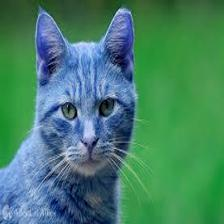

In [40]:
X[3]

In [41]:
y

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [43]:
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle=True,random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(445, 224, 224, 3)
(112, 224, 224, 3)
(445,)
(112,)


In [45]:
X_train_scale = X_train/255
X_test_scale = X_test/255

In [49]:
X_train_scale[0][0][0]

array([0.17647059, 0.29019608, 0.37254902])

Building Neural Network

In [53]:
import tensorflow as tf
import tensorflow_hub as hub

In [56]:
model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

pretrained_model = hub.KerasLayer(model_url,input_shape=(224,224,3),trainable=False)

In [57]:
num_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [58]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [60]:
model.fit(X_train_scale,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
13/13 [==============================] - 21s 2s/step - loss: 0.0415 - acc: 0.9925 - val_loss: 0.1392 - val_acc: 0.9333
Epoch 2/5
13/13 [==============================] - 26s 2s/step - loss: 0.0343 - acc: 0.9950 - val_loss: 0.1314 - val_acc: 0.9556
Epoch 3/5
13/13 [==============================] - 16s 1s/step - loss: 0.0297 - acc: 1.0000 - val_loss: 0.1316 - val_acc: 0.9556
Epoch 4/5
13/13 [==============================] - 15s 1s/step - loss: 0.0257 - acc: 1.0000 - val_loss: 0.1245 - val_acc: 0.9556
Epoch 5/5
13/13 [==============================] - 17s 1s/step - loss: 0.0227 - acc: 1.0000 - val_loss: 0.1210 - val_acc: 0.9556


In [62]:
loss , accuracy = model.evaluate(X_test_scale,y_test)

print(loss*100)
print(accuracy*100)

4/4 [==============================] - 5s 1s/step - loss: 0.2459 - acc: 0.9375
24.58673268556595
93.75


Example

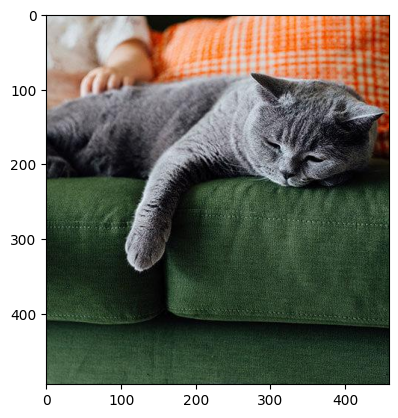

1/1 [==============================] - 0s 88ms/step
The image is of a cat


In [65]:
input_path = ('/content/test/cats/cat_114.jpg')

image = cv2.imread(input_path)

img = mpimg.imread(input_path)

plt.imshow(img)
plt.show()

image = cv2.resize(image,(224,224))
image = np.array(image)
image = image/255
image = np.reshape(image,[1,224,224,3])

prediction = model.predict(image)
predition = np.argmax(prediction)

if predition == 0:
  print('The image is of a cat')
else:
  print('The image is of a dog')